In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

#**Q2. a)**

In [ ]:
# Q2.a

#Loading the dataset
iris = datasets.load_iris()
dataset=pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['SepalLengthCm','SepalWidthCm', 'PetalLengthCm','PetalWidthCm', 'Species'])
dataset = dataset.astype({"Species": int})

dataset.shape

dataset.head(5)

dataset.describe()

dataset.groupby('Species').size()

dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
#Dividing the dataset into features and labels
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = dataset[feature_columns].values
y = dataset['Species'].values


In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
#Splitting data into training(80%) and test(20%) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 432x288 with 0 Axes>

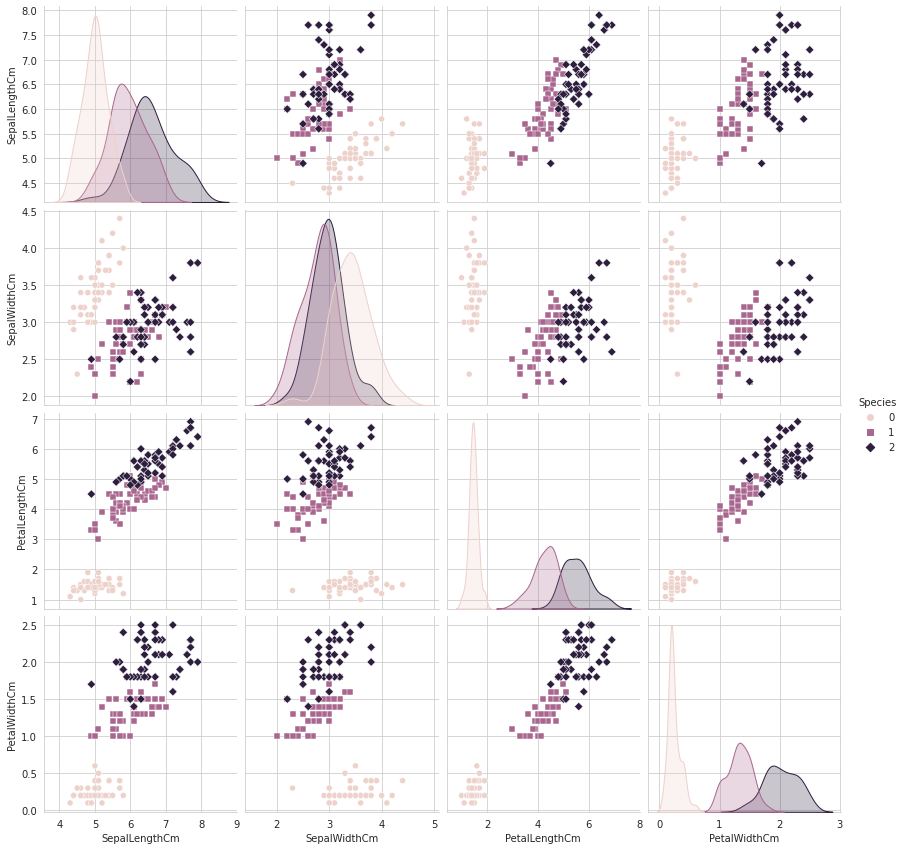

In [ ]:
#Data Visualisation using Pair Plot
plt.figure()
sns.pairplot(dataset, hue = "Species", height=3, markers=["o", "s", "D"])
plt.show()

In [ ]:
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
#Classification Metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [ ]:
#Cross Validation for Parameter Tuning
# find optimal value of k

# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

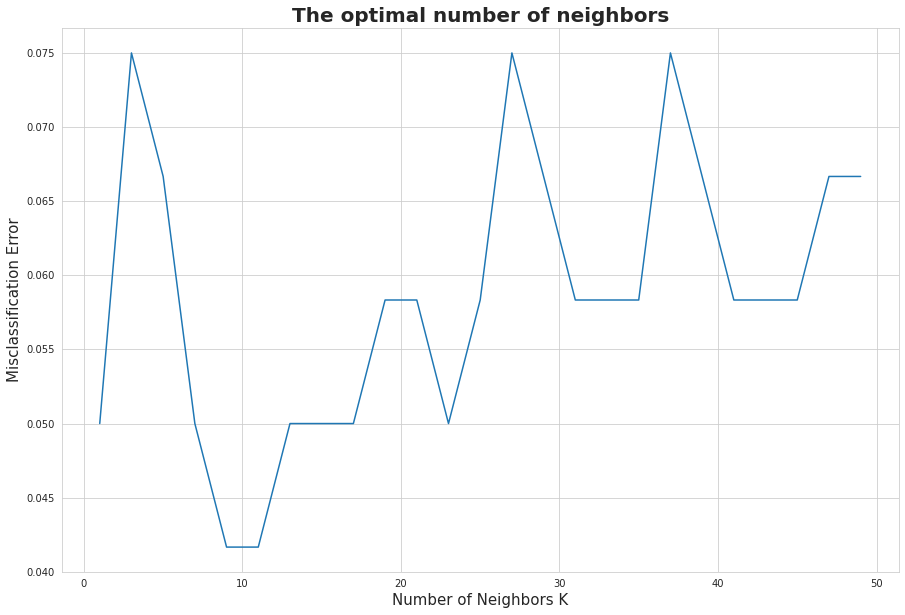

In [ ]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [ ]:
# finding the best value for parameter k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 9.


In [ ]:
# Again applying knn using k=9

# Instantiate learning model (k = 9)
classifier = KNeighborsClassifier(n_neighbors=9)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
#Classification Metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

#**Q2. b)**

In [ ]:
# Q2.b
iris_df = pd.DataFrame(data=iris.data, columns=["Sepal Length","Sepal Width","Petal Length","Petal Width"])

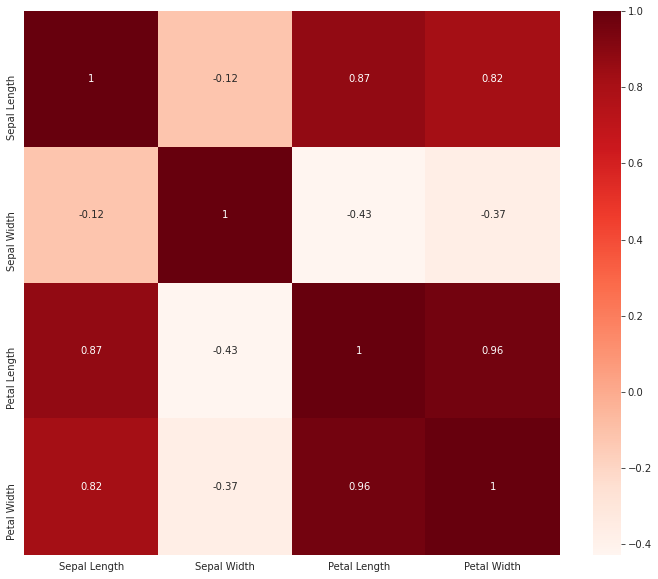

In [ ]:
#Pearson Correlation
plt.figure(figsize=(12,10))
cor = iris_df.corr(method="pearson")
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

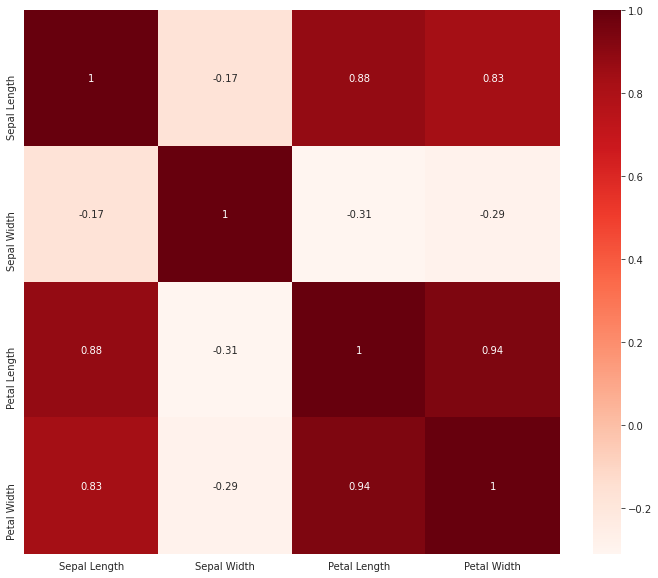

In [ ]:
#Spearman Correlation
plt.figure(figsize=(12,10))
cor = iris_df.corr(method="spearman")
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
# Conclusion
#Given Correlation threshold = 90%
#As observed from both the heatmaps, we can see that the attributes "Petal Width", "Petal Length" have correlation of more than 90% (96 and 94 percent respectively). Hence one of these features can be dropped.
#Let's drop Petal Width
iris_df.drop(["Petal Width"], axis=1)

,Sepal Length,Sepal Width,Petal Length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,5.2
148,6.2,3.4,5.4


#**Q2. c)**

In [ ]:
#Q2.c
#Principle Component Analysis
#Note: As PCA is effected by scale so we need to scale the features in our data before applying PCA.



# Separating out the features
x = iris_df.values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Principal Component 1', 'Principal Component 2'])

finalDf = pd.concat([principalDf, pd.DataFrame(data = y, columns = ["target"])], axis=1)
finalDf

,Principal Component 1,Principal Component 2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


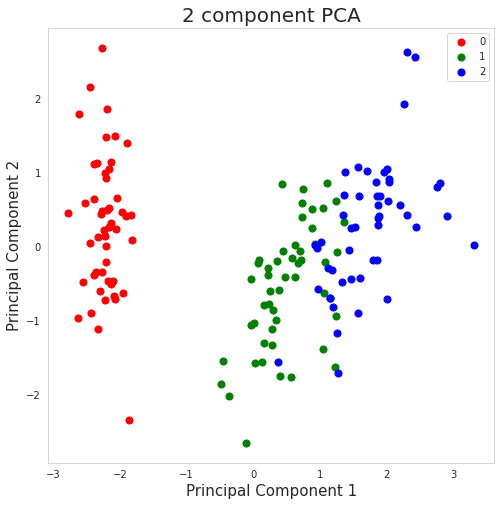

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
targets = [0,1,2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Principal Component 1']
               , finalDf.loc[indicesToKeep, 'Principal Component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Applying Knn again on the new dataset
newX_df = principalDf
feature_columns = ['Principal Component 1', 'Principal Component 2']
X = newX_df[feature_columns].values
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train1, y_train1)

# Predicting the Test set results
y_pred1 = classifier.predict(X_test1)

In [ ]:
#Classification Metrics
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.85      0.92        13
           2       0.75      1.00      0.86         6

    accuracy                           0.93        30
   macro avg       0.92      0.95      0.92        30
weighted avg       0.95      0.93      0.94        30



In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test1, y_pred1)
cm

array([[11,  0,  0],
       [ 0, 11,  2],
       [ 0,  0,  6]])

In [ ]:
#Cross Validation for Parameter Tuning
# find optimal value of k

# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train1, y_train1, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

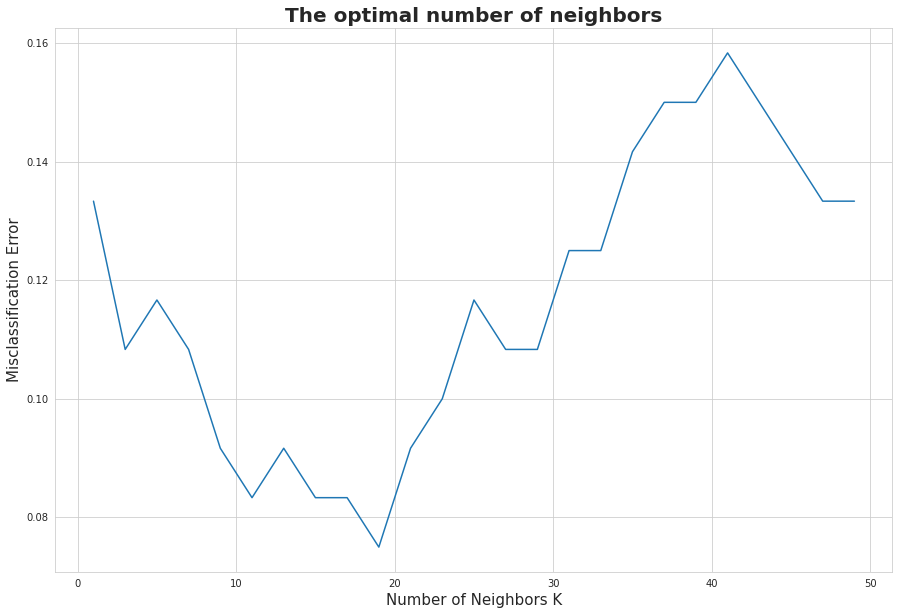

In [ ]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [ ]:
# finding the best value for parameter k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 19.


In [ ]:
# Again applying knn using k=19

# Instantiate learning model (k = 19)
classifier = KNeighborsClassifier(n_neighbors=19)

# Fitting the model
classifier.fit(X_train1, y_train1)

# Predicting the Test set results
y_pred1 = classifier.predict(X_test1)

In [ ]:
#Classification Metrics
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.85      0.92        13
           2       0.75      1.00      0.86         6

    accuracy                           0.93        30
   macro avg       0.92      0.95      0.92        30
weighted avg       0.95      0.93      0.94        30



In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test1, y_pred1)
cm

array([[11,  0,  0],
       [ 0, 11,  2],
       [ 0,  0,  6]])